In [1]:
import numpy as np
import igraph as ig
import dionysus as d
import multiprocessing
# from dask.distributed import Client
from zigzag import sliding_windows, zigzag_network
from wrcf import wrcf_diagram
from sliced_wasserstein import diagram_array, SW_approx
import dill

In [2]:
def random_edge_presences(T, f):
    """Generate random times sampled over a periodic distribution.
    :param T: time range
    :param f: frequency
    :return: an array of times.
    """
    density = np.sin(f * np.arange(T)) + 1
    density /= np.sum(density)
    samplesize = np.random.randint(T//2)
    times = np.random.choice(np.arange(T), size=samplesize, replace=False, p=density)
    times = np.sort(times)
    return times

In [3]:
def remove_inf(dgm):
    """Remove infinite points in a persistence diagram.
    :param dgm: Diagram
    :return: the same diagram without the infinite points.
    """
    res = d.Diagram()
    for p in dgm:
        if p.death != np.inf:
            res.append(p)
    return res

In [4]:
## Global parameters
NODES = 40
EDGE_PROB = 0.9
TIME_RANGE = 200
FREQ = 15/TIME_RANGE
N_WINDOWS = 20
## Computations
ZIGZAG_PERS = True
WRCF_PERS = True
SW_KERNEL = True
BOTTLENECK_DIST = True

In [45]:
print("Generating random temporal network...", end="", flush=True)

basegraph = ig.Graph.Erdos_Renyi(NODES, EDGE_PROB)
g = ig.Graph()
g.add_vertices(len(basegraph.vs))

for e in basegraph.es:
    times = random_edge_presences(TIME_RANGE, FREQ)
    for t in times:
        g.add_edge(e.source, e.target, time=t)
print("done.")

Generating random temporal network...done.


In [46]:
df = g.get_edge_dataframe()

In [48]:
g.is_directed()

False

In [47]:
df[df['time'] == 15]

,source,target,time
edge ID,,,
58,1,2,15
155,1,3,15
451,1,5,15
656,0,6,15
712,3,6,15
...,...,...,...
32522,24,39,15
32564,25,39,15
32619,26,39,15


In [37]:
gg = ig.disjoint_union([g1, g2])

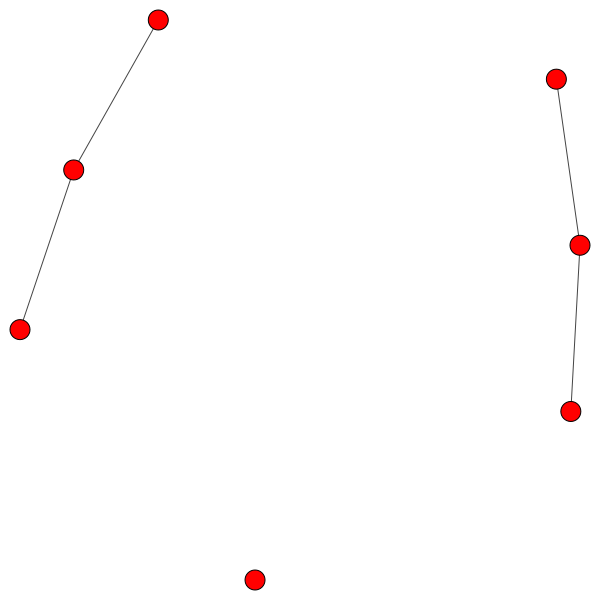

In [38]:
ig.plot(gg)

In [31]:
from igraph import Graph

# Create some sample graphs with vertex names
g1 = Graph(edges=[(0, 1), (1, 2)], directed=False)
g1.vs["name"] = ["A", "B", "C"]

g2 = Graph(edges=[(0, 1), (1, 3)], directed=False)
g2.vs["name"] = ["B", "C", "D"]

g3 = Graph(edges=[(0, 2), (2, 3)], directed=False)
g3.vs["name"] = ["A", "D", "E"]

# Combine the graphs with disjoint union
combined_graph = Graph.disjoint_union(g1, g2)

# Find the indices of vertices with the same names
# vertex_names = combined_graph.vs["name"]
# unique_names = list(set(vertex_names))
# name_to_index = {name: [] for name in unique_names}


# Map names to their respective indices
# for idx, name in enumerate(vertex_names):
#     name_to_index[name].append(idx)


# Contract vertices with the same name
# for name, indices in name_to_index.items():
#     if len(indices) > 1:
#         combined_graph.contract_vertices(indices, combine_attrs="first")


# Simplify the graph to remove duplicate edges (if needed)
# combined_graph.simplify(multiple=True, loops=False)

# # Inspect the combined graph
# print("Vertex names:", combined_graph.vs["name"])
# print("Edges:", combined_graph.get_edgelist())

In [34]:
g1.get_edge_dataframe()

,source,target
edge ID,,
0,0,1
1,1,2


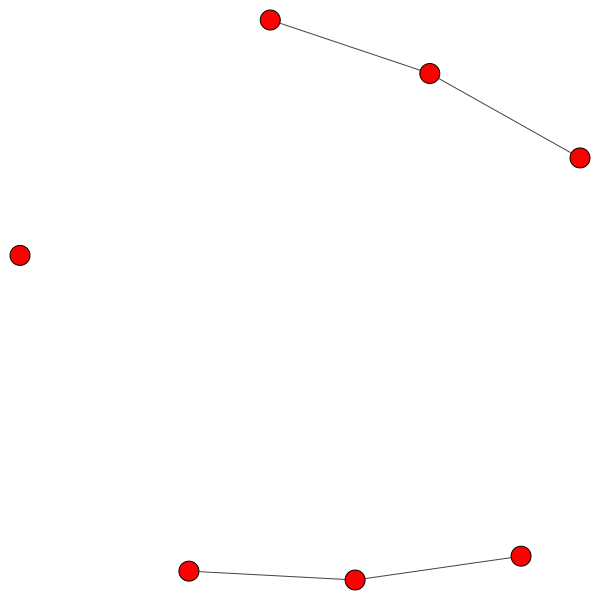

In [32]:
ig.plot(combined_graph)